In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import sklearn.linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score, mean_absolute_error

In [2]:
symbol='MSFT'
START='2016-01-01'
END='2024-01-01'
data_frame=yf.download(symbol,start=START,end=END)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data_frame

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,54.320000,54.799999,53.389999,54.799999,48.521473,53778000
2016-01-05,54.930000,55.389999,54.540001,55.049999,48.742836,34079700
2016-01-06,54.320000,54.400002,53.639999,54.049999,47.857399,39518900
2016-01-07,52.700001,53.490002,52.070000,52.169998,46.192791,56564900
2016-01-08,52.369999,53.279999,52.150002,52.330002,46.334476,48754000
...,...,...,...,...,...,...
2023-12-22,373.679993,375.179993,372.709991,374.579987,373.215424,17091100
2023-12-26,375.000000,376.940002,373.500000,374.660004,373.295135,12673100
2023-12-27,373.690002,375.059998,372.809998,374.070007,372.707275,14905400


In [15]:
df = pd.DataFrame(data_frame)
df
df['Prev_open'] = df['Open'].shift(1)
df['Prev_high'] = df['High'].shift(1)
df['Prev_low'] = df['Low'].shift(1)
df['Prev_close'] = df['Close'].shift(1)
df['Prev_adjclose'] = df['Adj Close'].shift(1)
df.dropna(inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume,Prev_open,Prev_high,Prev_low,Prev_close,Prev_adjclose
Date,,,,,,,,,,,
2016-01-05,54.930000,55.389999,54.540001,55.049999,48.742836,34079700,54.320000,54.799999,53.389999,54.799999,48.521473
2016-01-06,54.320000,54.400002,53.639999,54.049999,47.857399,39518900,54.930000,55.389999,54.540001,55.049999,48.742836
2016-01-07,52.700001,53.490002,52.070000,52.169998,46.192791,56564900,54.320000,54.400002,53.639999,54.049999,47.857399
2016-01-08,52.369999,53.279999,52.150002,52.330002,46.334476,48754000,52.700001,53.490002,52.070000,52.169998,46.192791
2016-01-11,52.509998,52.849998,51.459999,52.299999,46.307896,36943800,52.369999,53.279999,52.150002,52.330002,46.334476
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,373.679993,375.179993,372.709991,374.579987,373.215424,17091100,372.559998,374.410004,370.040009,373.540009,372.179199
2023-12-26,375.000000,376.940002,373.500000,374.660004,373.295135,12673100,373.679993,375.179993,372.709991,374.579987,373.215424
2023-12-27,373.690002,375.059998,372.809998,374.070007,372.707275,14905400,375.000000,376.940002,373.500000,374.660004,373.295135


In [5]:
#rb7
X=df[['Prev_open','Prev_high','Prev_low','Prev_close']].values.reshape(-1,1)
Y=df['Open'].values.reshape(-1,1)
print(X)
print(Y)

[[ 54.31999969]
 [ 54.79999924]
 [ 53.38999939]
 ...
 [376.45999146]
 [374.16000366]
 [375.27999878]]
[[ 54.93000031]
 [ 54.31999969]
 [ 52.70000076]
 ...
 [373.69000244]
 [375.36999512]
 [376.        ]]


In [17]:
X=df[['Prev_open','Prev_high','Prev_low','Prev_close','Prev_adjclose']]
Y=df[['Open']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, random_state=0)

#rb7
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
Y_train_scaled = scaler.fit_transform(Y_train)
#print(X_train_scaled)
#print(Y_train_scaled)
Y_test_scaled = scaler.transform(Y_test)


data = sklearn.linear_model.LinearRegression()
data.fit(X_train_scaled, Y_train_scaled)
X_1 = [[373.690002,	375.059998,	372.809998,	374.070007, 372.707275]] #2nd last from imported data
print(data.predict(X_1))
X_2 = [[376.6700074, 377.059998, 374.809998, 377.023479, 375.984521]]
print(data.predict(X_2))

[[374.028149]]
[[376.58314551]]


In [18]:
Y_pred = data.predict(X_test)
#print(Y_pred)
#cm=confusion_matrix(Y_test, Y_pred)
#print('Confusion matrix :',cm)
#cr=classification_report(Y_test, Y_pred)
#print('Classification report :',cr)
#accuracy=accuracy_score(Y_test, Y_pred)
#print('Accuracy:',accuracy)

# Instead of confusion matrix, use metrics suitable for regression problems
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("R squared:",r2)

#rb7
Y_train_pred = data.predict(X_train)
Y_test_pred = data.predict(X_test)
train_r2 = r2_score(Y_train, Y_train_pred)
test_r2 = r2_score(Y_test, Y_test_pred)

# Cross-validation R²
cv_r2_scores = cross_val_score(data, X_train_scaled, Y_train_scaled, cv=5, scoring='r2')
mean_cv_r2 = np.mean(cv_r2_scores)

print(f"Training R-squared (R²): {train_r2}")
print(f"Test R-squared (R²): {test_r2}")
print(f"Cross-validation R-squared (R²): {mean_cv_r2}")

Mean Absolute Error: 1.2028625636044217
Mean Squared Error: 4.771473763428696
R squared: 0.9994867069668334
Training R-squared (R²): 0.9995592405712895
Test R-squared (R²): 0.9994867069668334
Cross-validation R-squared (R²): 0.9995474956406234


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


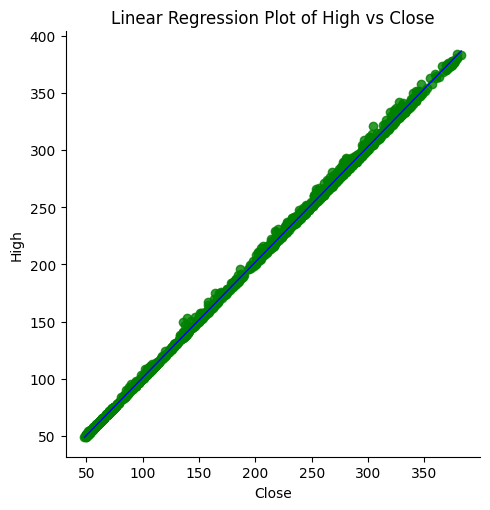

In [12]:
sns.lmplot(x='Close', y='High', data=df,
           scatter_kws={'marker': 'o', 'color': 'green'},
           line_kws={'linewidth': 1, 'color': 'blue'})
plt.title('Linear Regression Plot of High vs Close')
plt.show()